In [1]:
!pip install numpy pandas matplotlib seaborn --quiet

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import jovian
import os
%matplotlib inline

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Reference and files
https://www.kaggle.com/c/rossmann-store-sales/data

1. Rossmann_train.csv - historicaldata including sales
2. Rossmann_test.csv - historical data excluding sales
3. Rossmann_store.csv - supplemental information about the stores
4. Rossmann_sample_submission.csv - sample submission file in the correct format 

In [4]:
ross_df = pd.read_csv('Rossmann_train.csv', low_memory=False)
store_df = pd.read_csv('Rossmann_store.csv')
test_df = pd.read_csv('Rossmann_test.csv')
submission_df = pd.read_csv('Rossmann_sample_submission.csv')

In [5]:
ross_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [6]:
store_df

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [7]:
test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

In [8]:
submission_df

Id  Sales
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
41083  41084      0
41084  41085      0
41085  41086      0
41086  41087      0
41087  41088      0

[41088 rows x 2 columns]

Merge the information from "store_df" into "train_df "and "test_df" by "left outer join".

<img src="https://dotnettutorials.net/wp-content/uploads/2019/06/c-users-pranaya-pictures-left-outer-join-in-linq-.png" width ='320'>

In [9]:
# retains all the days of datafrom the training set
# for each day we add the information of appropriate store
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [10]:
merged_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    NaN              NaN               NaN  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN  
...                  ...              ...               ...  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              NaN              NaN               NaN  
1017206              NaN              NaN               NaN  
1017207              NaN              NaN               NaN  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [11]:
fig = px.scatter(merged_df.sample(6000), 
                 x='Sales', 
                 y='Customers', 
                 color='StoreType', 
                 opacity=0.3, 
                 title='effect of store type and customers on sales')
fig.update_traces(marker_size=5)
fig.show()

 Heteroskedasticity maybe because of wide range of values 

### Preprocessing and Feature Engineering

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

All the dates in test set occur after the dates of training set. Date converts to daytime object and then parse out information from the date.

### Date 
Convert "Date" to a datecolumn and extract different parts of date. 

In [13]:
def split_date(df):                                  #Split date function takes a data frame (df)
    df['Date'] = pd.to_datetime(df['Date'])          # with pandas, convert the date column into the datetime column
    df['Year'] = df.Date.dt.year                     # extract out the year
    df['Month'] = df.Date.dt.month                   # extract out the month
    df['Day'] = df.Date.dt.day                       # extract out the day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week # extract out the week of the year

In [14]:
# Split date on "merged_df" and "merged_test_df"
split_date(merged_df)
split_date(merged_test_df)

In [15]:
merged_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0              1         c  ...                       9.0   
1              1         a  ...                      11.0   
2              1         a  ...                      12.0   
3              1         c  ...                       9.0   
4              1         a  ...                       4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  Year Month  Day  WeekOfYear  
0              NaN  2015     7   31          31  
1  Jan,Apr,Jul,Oct  2015     7   31          31  
2  Jan,Apr,Jul,Oct  2015     7   31          31  
3              NaN  2015     7   31          31  
4              NaN  2015     7   31          31  

[5 rows x 22 columns]

### Store Open/Closed
Note the sales are zero whenever the store is closed.

In [16]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

in 172817 rows the store was closed and the sale was zero

In [17]:
# Train the model when the store is open. So, pick the rows of data when store is open.
# Note , don't remove any rows from test set because we generate predictions for all rows in the test set
merged_df = merged_df[merged_df.Open == 1].copy()

### Competition

Use the "CompetitionOpenSince[Month/Year]" columns from "store_df" to compute the number of months for which a competitor has been open near the store.

Using the current day and information of "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear", we can calculate a new column called "competitionOpen" that is number of months that the store was opened.

"df.Year - df.CompetitionOpenSinceYear" shows how many years the competition was opened and "df.Month-df.CompetitionOpenSinceMonth" shows how many months the competition was opened

In [18]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [19]:
comp_months(merged_df)
comp_months(merged_test_df)

In [20]:
merged_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceYear  \
0                  0              1         c  ...                   2008.0   
1                  0              1         a  ...                   2007.0   
2                  0              1         a  ...                   2006.0   
3                  0              1         c  ...                   2009.0   
4                  0              1         a  ...                   2015.0   
...              ...            ...       ...  ...                      ...   
1016776            a              1         b  ...                   2006.0   
1016827            a              1         b  ...                   1999.0   
1016863            a              1         b  ...                      NaN   
1017042            a              1         b  ...                      NaN   
1017190            a              1         b  ...                   2002.0   

         Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  \
0             0              NaN              NaN              NaN  2015   
1             1             13.0           2010.0  Jan,Apr,Jul,Oct  2015   
2             1             14.0           2011.0  Jan,Apr,Jul,Oct  2015   
3             0              NaN              NaN              NaN  2015   
4             0              NaN              NaN              NaN  2015   
...         ...              ...              ...              ...   ...   
1016776       0              NaN              NaN              NaN  2013   
1016827       0              NaN              NaN              NaN  2013   
1016863       1             48.0           2012.0  Jan,Apr,Jul,Oct  2013   
1017042       0              NaN              NaN              NaN  2013   
1017190       0              NaN              NaN              NaN  2013   

         Month Day  WeekOfYear  CompetitionOpen  
0            7  31          31             82.0  
1            7  31          31             92.0  
2            7  31          31            103.0  
3            7  31          31             70.0  
4            7  31          31              3.0  
...        ...  ..         ...              ...  
1016776      1   1           1             76.0  
1016827      1   1           1            159.0  
1016863      1   1           1              0.0  
1017042      1   1           1              0.0  
1017190      1   1           1            130.0  

[844392 rows x 23 columns]

In [21]:
# View the results of the new columns we have created.
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

Date  CompetitionDistance  CompetitionOpenSinceYear  \
621422  2013-12-21               1090.0                    2007.0   
555065  2014-02-19               7250.0                    2013.0   
981650  2013-02-01               3570.0                    2009.0   
364657  2014-08-16                450.0                       NaN   
445760  2014-05-28                580.0                    2005.0   
221200  2015-01-14               4520.0                       NaN   
752752  2013-08-26                280.0                       NaN   
673229  2013-11-05               1560.0                    2014.0   
394012  2014-07-16               7860.0                    2005.0   
683916  2013-10-26                240.0                       NaN   
1419    2015-07-30               2470.0                    2005.0   
843162  2013-06-06                 30.0                    2010.0   
1001303 2013-01-15                720.0                    2014.0   
220555  2015-01-15               3170.0                    2014.0   
499338  2014-04-10              10950.0                    2014.0   
443518  2014-05-30               1200.0                    2009.0   
335907  2014-09-16               2780.0                    2015.0   
939723  2013-03-11               6540.0                       NaN   
7050    2015-07-25               4490.0                    2014.0   
455942  2014-05-19                450.0                       NaN   

         CompetitionOpenSinceMonth  CompetitionOpen  
621422                         4.0             80.0  
555065                        12.0              2.0  
981650                        11.0             39.0  
364657                         NaN              0.0  
445760                         1.0            112.0  
221200                         NaN              0.0  
752752                         NaN              0.0  
673229                         1.0              0.0  
394012                         5.0            110.0  
683916                         NaN              0.0  
1419                           2.0            125.0  
843162                         9.0             33.0  
1001303                       10.0              0.0  
220555                         4.0              9.0  
499338                         3.0              1.0  
443518                         9.0             56.0  
335907                         6.0              0.0  
939723                         NaN              0.0  
7050                           5.0             14.0  
455942                         NaN              0.0

### Additional Promotion

We can also add some additional columns to indicate how long a store has been running 'Promo2' and whether a new round of 'Promo2' starts in the current month.

In [22]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [23]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [24]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

Date  Promo2  Promo2SinceYear  Promo2SinceWeek     PromoInterval  \
770297 2013-08-10       0              NaN              NaN               NaN   
54752  2015-06-12       0              NaN              NaN               NaN   
265169 2014-12-01       0              NaN              NaN               NaN   
57304  2015-06-10       1           2009.0             45.0   Feb,May,Aug,Nov   
405338 2014-07-04       0              NaN              NaN               NaN   
812593 2013-07-03       1           2010.0             13.0   Jan,Apr,Jul,Oct   
359125 2014-08-22       0              NaN              NaN               NaN   
538493 2014-03-06       1           2013.0             36.0  Mar,Jun,Sept,Dec   
554669 2014-02-19       0              NaN              NaN               NaN   
155943 2015-03-14       0              NaN              NaN               NaN   
978068 2013-02-05       1           2009.0             37.0   Jan,Apr,Jul,Oct   
759350 2013-08-20       0              NaN              NaN               NaN   
301984 2014-10-22       0              NaN              NaN               NaN   
553688 2014-02-20       1           2012.0             27.0  Mar,Jun,Sept,Dec   
270940 2014-11-25       1           2011.0             14.0   Jan,Apr,Jul,Oct   
164162 2015-03-06       1           2009.0             37.0   Jan,Apr,Jul,Oct   
218129 2015-01-17       1           2011.0             18.0   Feb,May,Aug,Nov   
596226 2014-01-13       1           2012.0             40.0   Jan,Apr,Jul,Oct   
774848 2013-08-06       0              NaN              NaN               NaN   
303196 2014-10-21       1           2011.0              9.0   Feb,May,Aug,Nov   

        Promo2Open  IsPromo2Month  
770297    0.000000              0  
54752     0.000000              0  
265169    0.000000              0  
57304    67.180328              0  
405338    0.000000              0  
812593   39.213115              1  
359125    0.000000              0  
538493    6.032787              1  
554669    0.000000              0  
155943    0.000000              0  
978068   40.885246              0  
759350    0.000000              0  
301984    0.000000              0  
553688   19.639344              0  
270940   43.803279              0  
164162   65.803279              0  
218129   44.557377              0  
596226   15.508197              1  
774848    0.000000              0  
303196   43.803279              0

In [25]:
merged_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType  ... Promo2SinceWeek  \
0                  0              1         c  ...             NaN   
1                  0              1         a  ...            13.0   
2                  0              1         a  ...            14.0   
3                  0              1         c  ...             NaN   
4                  0              1         a  ...             NaN   
...              ...            ...       ...  ...             ...   
1016776            a              1         b  ...             NaN   
1016827            a              1         b  ...             NaN   
1016863            a              1         b  ...            48.0   
1017042            a              1         b  ...             NaN   
1017190            a              1         b  ...             NaN   

         Promo2SinceYear    PromoInterval  Year  Month  Day  WeekOfYear  \
0                    NaN              NaN  2015      7   31          31   
1                 2010.0  Jan,Apr,Jul,Oct  2015      7   31          31   
2                 2011.0  Jan,Apr,Jul,Oct  2015      7   31          31   
3                    NaN              NaN  2015      7   31          31   
4                    NaN              NaN  2015      7   31          31   
...                  ...              ...   ...    ...  ...         ...   
1016776              NaN              NaN  2013      1    1           1   
1016827              NaN              NaN  2013      1    1           1   
1016863           2012.0  Jan,Apr,Jul,Oct  2013      1    1           1   
1017042              NaN              NaN  2013      1    1           1   
1017190              NaN              NaN  2013      1    1           1   

        CompetitionOpen  Promo2Open  IsPromo2Month  
0                  82.0    0.000000              0  
1                  92.0   64.131148              1  
2                 103.0   51.901639              1  
3                  70.0    0.000000              0  
4                   3.0    0.000000              0  
...                 ...         ...            ...  
1016776            76.0    0.000000              0  
1016827           159.0    0.000000              0  
1016863             0.0    1.213115              1  
1017042             0.0    0.000000              0  
1017190           130.0    0.000000              0  

[844392 rows x 25 columns]

### Input and Target Columns

Select the columns that we'll use for training.

In [26]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [27]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [28]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [29]:
test_inputs = merged_test_df[input_cols].copy()

In [30]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Impute missing numerical data

In [31]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [32]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

Missing data of "CompetitionDistance" in both "inputs" and "test_inputs" indicates the competitors are far from some stores. 0 kilometer distance means competitors are very close to stores. The empty cells should be filled with the highest value of competition distance.

In [33]:
# find a maximum distance to one store
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [34]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [35]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

### Scale Numeric Values

Scale numeric values to the 0 to 1 range.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [38]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encode Categorical Columns

<img src="https://th.bing.com/th/id/OIP.sNxvpVYCn03AdB-V5sKyCAHaDh?w=317&h=166&c=7&r=0&o=5&dpr=1.3&pid=1.7" width='640'>

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [41]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [1]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

NameError: name 'encoder' is not defined

In [43]:
# Extract out all the numeric data for training.
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [44]:
X.head()

Store  Promo  SchoolHoliday  CompetitionDistance  CompetitionOpen  \
0  0.000000    1.0            1.0             0.016482         0.059163   
1  0.000898    1.0            1.0             0.007252         0.066378   
2  0.001795    1.0            1.0             0.186050         0.074315   
3  0.002693    1.0            1.0             0.007911         0.050505   
4  0.003591    1.0            1.0             0.394119         0.002165   

   Promo2  Promo2Open  IsPromo2Month  Day     Month  ...  StateHoliday_a  \
0     0.0    0.000000            0.0  1.0  0.545455  ...             0.0   
1     1.0    0.890710            1.0  1.0  0.545455  ...             0.0   
2     1.0    0.720856            1.0  1.0  0.545455  ...             0.0   
3     0.0    0.000000            0.0  1.0  0.545455  ...             0.0   
4     0.0    0.000000            0.0  1.0  0.545455  ...             0.0   

   StateHoliday_b  StateHoliday_c  StoreType_a  StoreType_b  StoreType_c  \
0             0.0             0.0          0.0          0.0          1.0   
1             0.0             0.0          1.0          0.0          0.0   
2             0.0             0.0          1.0          0.0          0.0   
3             0.0             0.0          0.0          0.0          1.0   
4             0.0             0.0          1.0          0.0          0.0   

   StoreType_d  Assortment_a  Assortment_b  Assortment_c  
0          0.0           1.0           0.0           0.0  
1          0.0           1.0           0.0           0.0  
2          0.0           1.0           0.0           0.0  
3          0.0           0.0           0.0           1.0  
4          0.0           1.0           0.0           0.0  

[5 rows x 30 columns]

In [45]:
X_test.head()

Store  Promo  SchoolHoliday  CompetitionDistance  CompetitionOpen  \
0  0.000000    1.0            0.0             0.016482         0.060606   
1  0.001795    1.0            0.0             0.186050         0.075758   
2  0.005386    1.0            0.0             0.316192         0.020924   
3  0.006284    1.0            0.0             0.098892         0.007937   
4  0.007181    1.0            0.0             0.026503         0.130592   

   Promo2  Promo2Open  IsPromo2Month       Day     Month  ...  StateHoliday_a  \
0     0.0    0.000000            0.0  0.533333  0.727273  ...             0.0   
1     1.0    0.743169            0.0  0.533333  0.727273  ...             0.0   
2     0.0    0.000000            0.0  0.533333  0.727273  ...             0.0   
3     0.0    0.000000            0.0  0.533333  0.727273  ...             0.0   
4     0.0    0.000000            0.0  0.533333  0.727273  ...             0.0   

   StateHoliday_b  StateHoliday_c  StoreType_a  StoreType_b  StoreType_c  \
0             0.0             0.0          0.0          0.0          1.0   
1             0.0             0.0          1.0          0.0          0.0   
2             0.0             0.0          1.0          0.0          0.0   
3             0.0             0.0          1.0          0.0          0.0   
4             0.0             0.0          1.0          0.0          0.0   

   StoreType_d  Assortment_a  Assortment_b  Assortment_c  
0          0.0           1.0           0.0           0.0  
1          0.0           1.0           0.0           0.0  
2          0.0           0.0           0.0           1.0  
3          0.0           1.0           0.0           0.0  
4          0.0           0.0           0.0           1.0  

[5 rows x 30 columns]

## Gradient Boosting

<img src="https://th.bing.com/th/id/R.a44bb62cd9b17fdb6d5c72002cf70407?rik=GENwpf2XeK056g&riu=http%3a%2f%2ftvas.me%2fassets%2fgbt-example.png&ehk=U7ooCTobatCGleZ5mvdLhyxvCg1e28iBBhVX1l%2b4Hd8%3d&risl=&pid=ImgRaw&r=0" width=640>

### Training

In [46]:
from xgboost import XGBRegressor

In [47]:
# ?XGBRegressor

In [103]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [49]:
%%time
model.fit(X, targets)

Wall time: 4.78 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [50]:
preds = model.predict(X)

In [51]:
preds

array([ 8127.9404,  7606.919 ,  8525.857 , ...,  6412.8247,  9460.068 ,
       10302.145 ], dtype=float32)

### Evaluation

Evaluate the predictions using RMSE error.

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False) # True returns MSE value, if False returns RMSE value.

In [54]:
rmse(preds, targets)

2377.752008804669

Loss on training set is 2377.7

In [55]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)



### Visualization
Installation of graphviz library is needed 

In [56]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

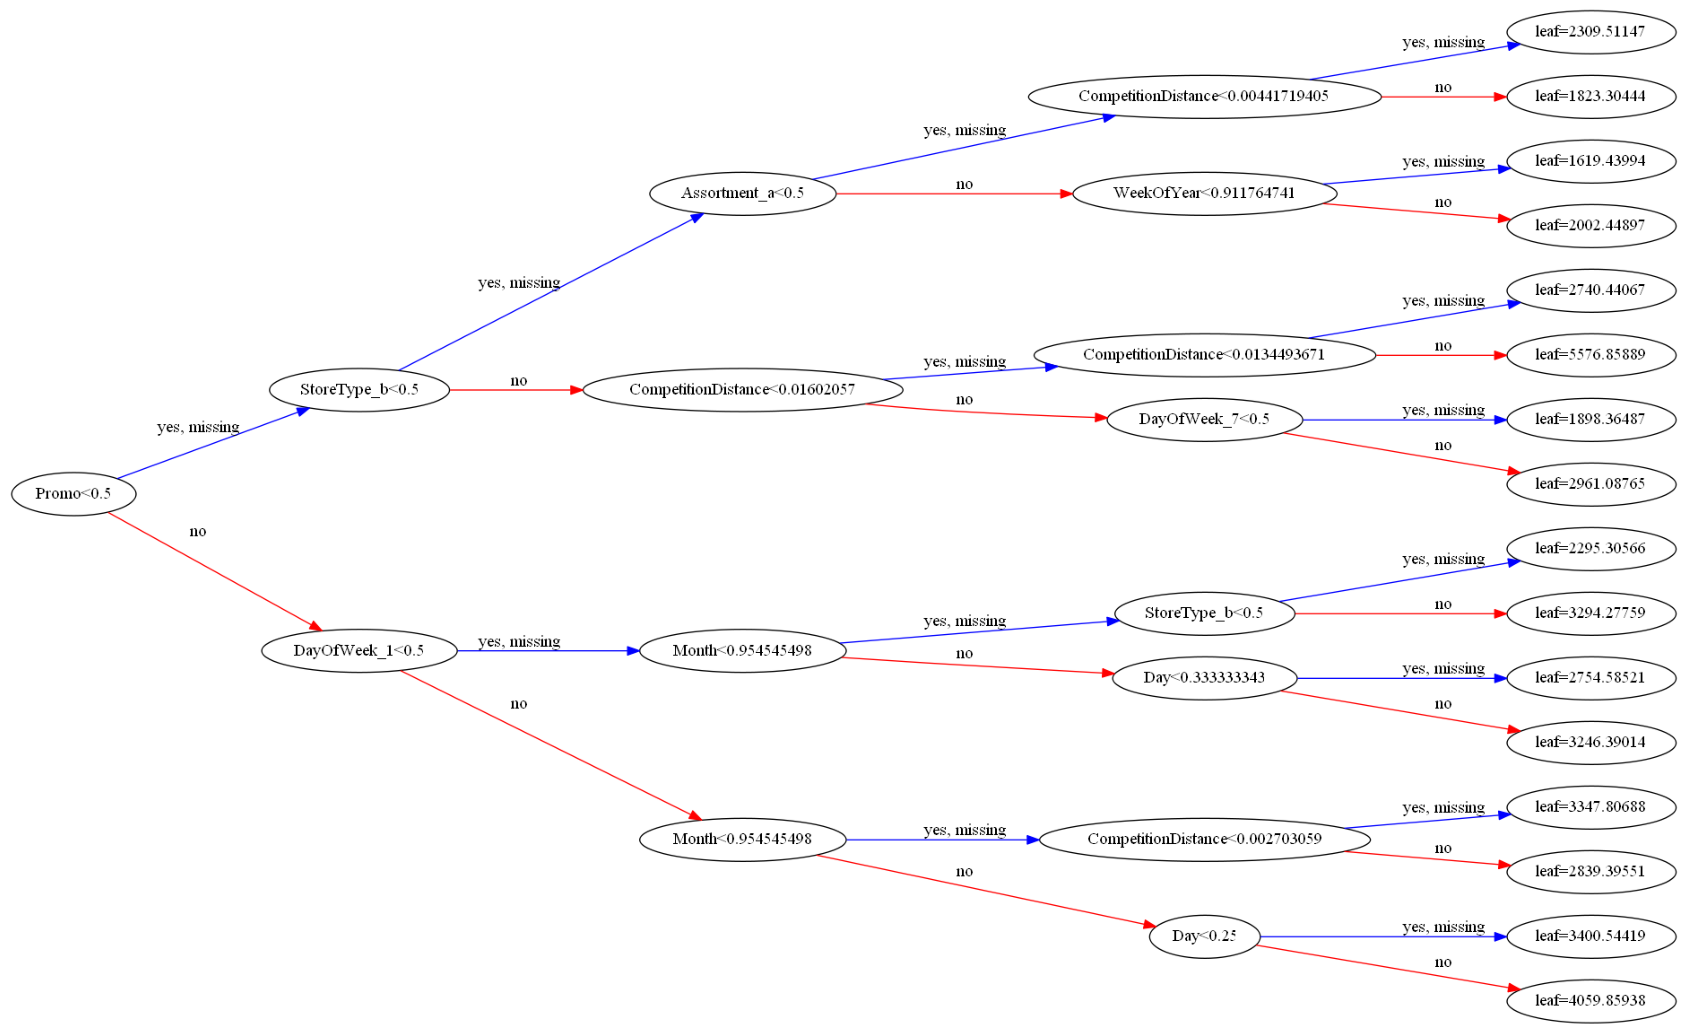

In [57]:
plot_tree(model, rankdir='LR'); # default number of trees is 0

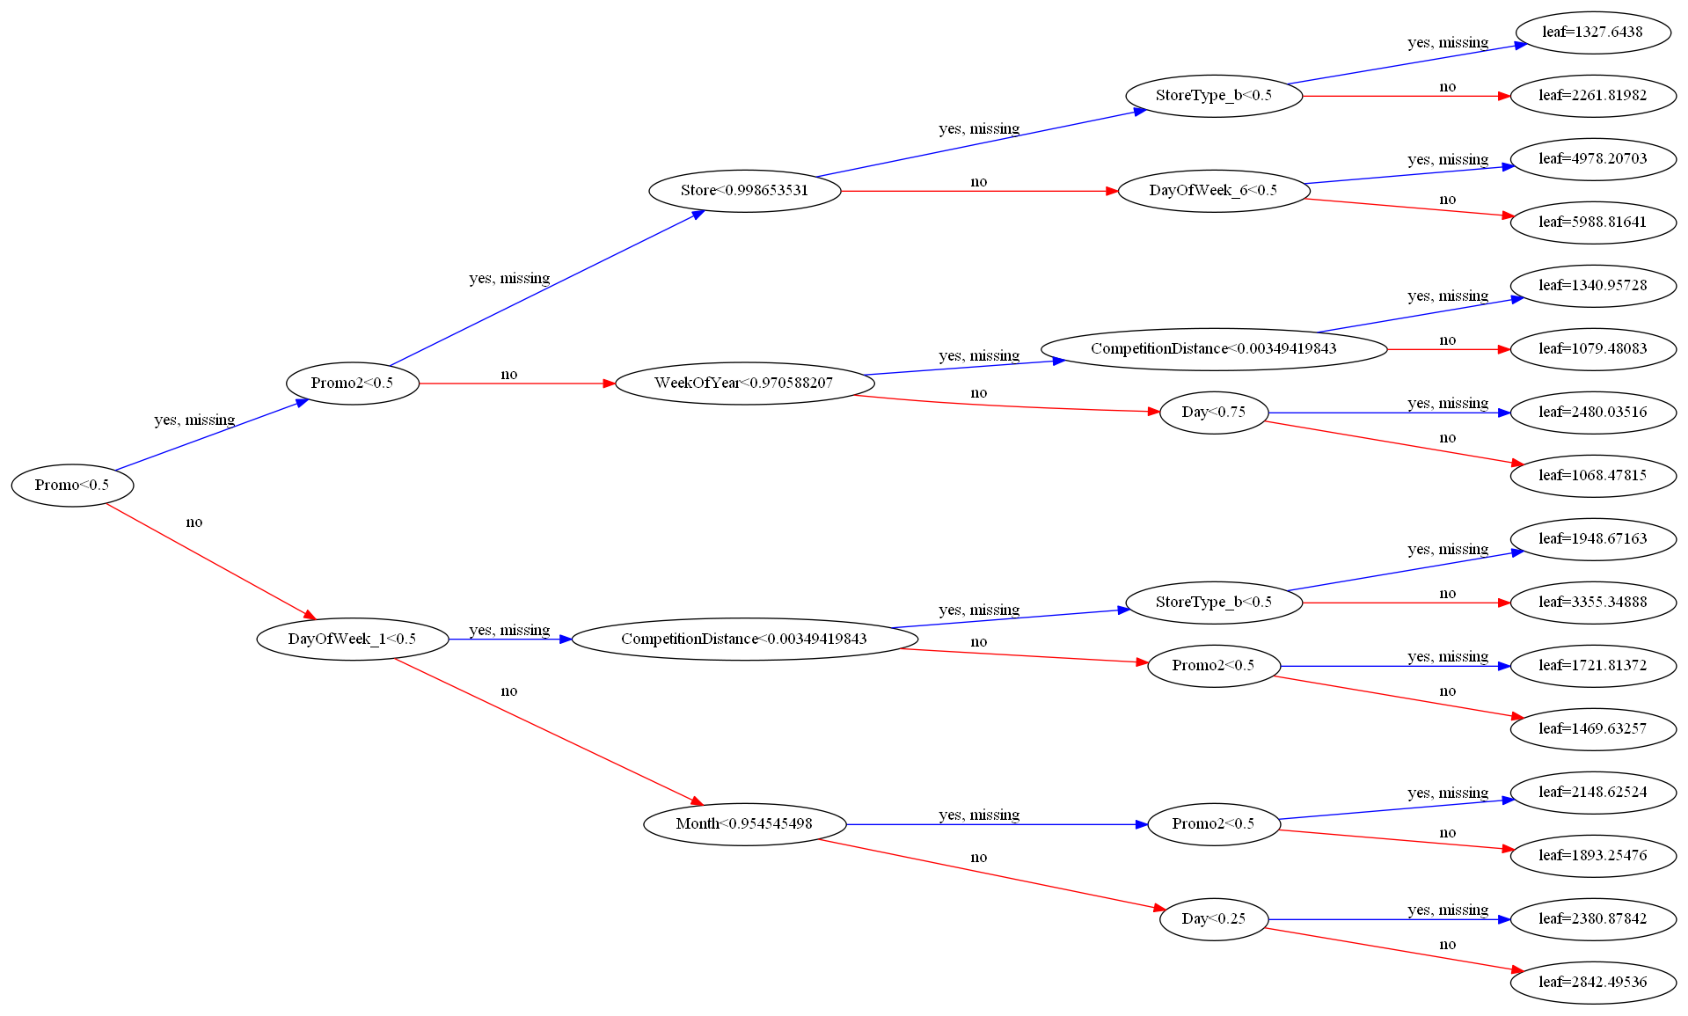

In [58]:
plot_tree(model, rankdir='LR', num_trees=1);

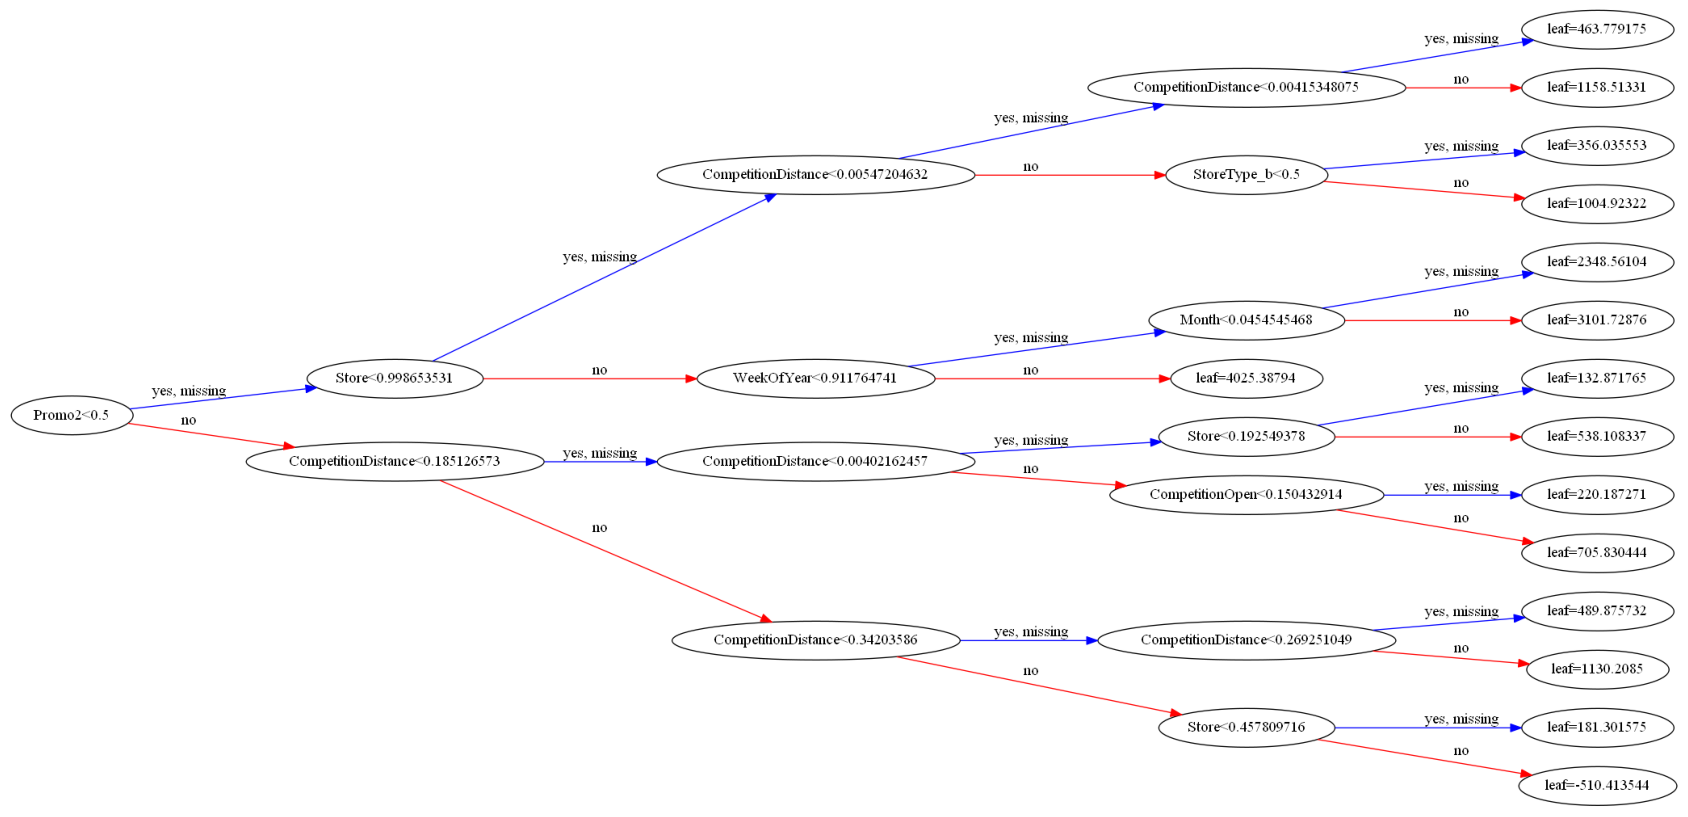

In [59]:
plot_tree(model, rankdir='LR', num_trees=5);

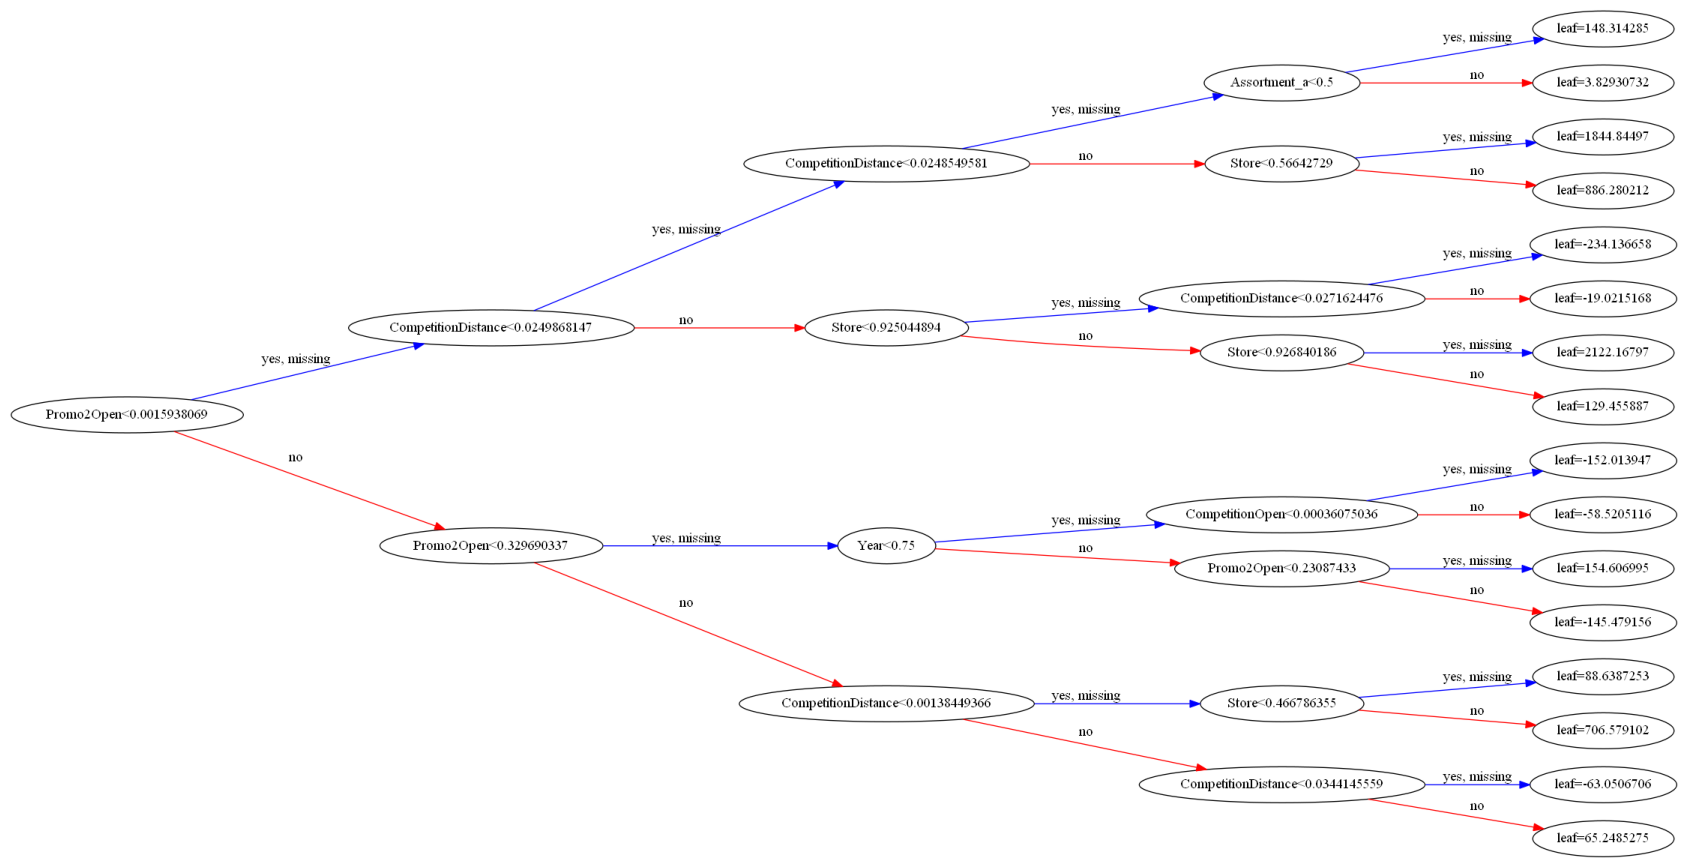

In [60]:
plot_tree(model, rankdir='LR', num_trees=19);

By encreasing the "num_trees", the amount of leaves get smaller.

Trees only compute residuals, and not the actual target value. We can also visualize the tree as text.

In [61]:
# dump it to a text file
trees = model.get_booster().get_dump()

In [62]:
len(trees)

20

In [63]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00441719405] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.002703059] yes=27,no=28,missing=27
				27:leaf=334

### Feature importance

XGBoost also provides a feature importance score for each column in the input.

In [64]:
importance_df = pd.DataFrame({
                            'feature': X.columns,
                            'importance': model.feature_importances_
                            }).sort_values('importance', ascending=False)

In [65]:
importance_df.head(10)

feature  importance
1                 Promo    0.317473
24          StoreType_b    0.086472
12          DayOfWeek_1    0.082269
5                Promo2    0.063986
3   CompetitionDistance    0.045053
29         Assortment_c    0.040226
27         Assortment_a    0.038759
9                 Month    0.038493
0                 Store    0.038119
8                   Day    0.033209

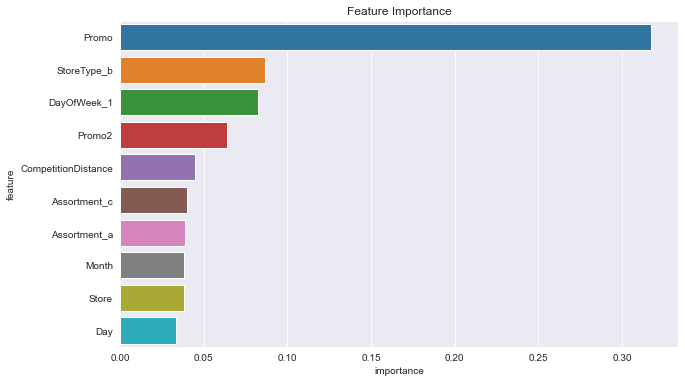

In [66]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## K Fold Cross Validation
<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png" width = 640>

Scikit-learn provides utilities for performing K fold cross validation.

In [67]:
from sklearn.model_selection import KFold

In [68]:
#Define a helper function train_and_evaluate which trains a model the given parameters and returns the trained model, training 
#error and validation error.
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse


Use the KFold utility to create the different training/validations splits and train a separate model for each fold.

In [69]:
# Create kfold object and pass the number of splits into the object
kfold = KFold(n_splits=5)

"train_idxs": indexes of rows for "train set" & "val_idxs": indexes of rows for "validation set" for  each split

As I call the object in for-loop, each time I get the "train_idxs" and "val_idxs" it will give me five splits.

"X.iloc[train_idxs]": from X ( = training input) extract "train_idxs" and give it to " X_train" and "targets.iloc[train_idxs]": from targets extract "val_idxs" and give it to "train_targets"

"X.iloc[val_idxs]"  again from X, extract [val_idxs] and send to  "X_val" and "targets.iloc[val_idxs]" from targets extract "val_idxs" and give it to "val_targets"

In [70]:
models = []

for train_idxs, val_idxs in kfold.split(X):   # give the data (x = training input) that we want to split in kfold object
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2352.216448531526, Validation RMSE: 2424.6228916973314
Train RMSE: 2406.709513789309, Validation RMSE: 2451.9646038059277
Train RMSE: 2365.7354745443067, Validation RMSE: 2336.984157073758
Train RMSE: 2366.4732092777763, Validation RMSE: 2460.8995475901697
Train RMSE: 2379.3752997474626, Validation RMSE: 2440.665320626728


In [71]:
# Define a function to average predictions from the 5 different models. "predict_avg" takes list of models and bunch of 
#inputs. For each model in models, it predict the inputs and calculate the average in each row by numpy. 
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [72]:
# it means
(models[0].predict(X) + models[1].predict(X)) /2

array([8099.5576, 7619.1406, 9281.087 , ..., 7327.912 , 7537.414 ,
       9145.4375], dtype=float32)

In [73]:
preds = predict_avg(models, X)

In [74]:
preds

array([8021.374 , 7577.715 , 8747.863 , ..., 7615.0303, 7924.784 ,
       9600.297 ], dtype=float32)

We can now use `predict_avg` to make predictions for the test set.

## Hyperparameter Tuning and Regularization

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

https://xgboost.readthedocs.io/en/latest/parameter.html

In [75]:
# ?XGBRegressor

In [76]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

 Helper function to test hyperparameters with K-fold cross validation.

In [77]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [80]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

### n_estimators

<img src ="https://th.bing.com/th/id/R.1309e990574547812ec25e520ef4b972?rik=aBqiVj%2fXsG39ug&riu=http%3a%2f%2fwww.chemometrie.com%2fphd%2fimages%2fimage024.gif&ehk=fY%2b4eIpizNq%2f40ywiKPCuOq%2fqjr7PT%2bUfMOqOxbEkKw%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1" width = 630>

The number of trees to be created. More trees = greater capacity of the model. More train, the lower loss deligate 

In [81]:
test_params(n_estimators=10)

Train RMSE: 2348.3670239974913, Validation RMSE: 2350.8546665083245


In [82]:
test_params(n_estimators=30)

Train RMSE: 1777.3328981774187, Validation RMSE: 1788.774045035103


In [83]:
#test_params(n_estimators=240) #it takes a lot of time

In [84]:
# test_params(n_estimators=100)

### max_depth
increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [85]:
test_params(max_depth=2, n_estimators = 10)

Train RMSE: 2681.0812183504418, Validation RMSE: 2680.758623080223


In [86]:
test_params(max_depth=5)

Train RMSE: 1394.2034751119422, Validation RMSE: 1417.062777248086


In [87]:
test_params(max_depth=10)

Train RMSE: 683.4523452654482, Validation RMSE: 791.7858906296814


### learning_rate

<img src ="https://th.bing.com/th/id/R.1309e990574547812ec25e520ef4b972?rik=aBqiVj%2fXsG39ug&riu=http%3a%2f%2fwww.chemometrie.com%2fphd%2fimages%2fimage024.gif&ehk=fY%2b4eIpizNq%2f40ywiKPCuOq%2fqjr7PT%2bUfMOqOxbEkKw%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1" width = 630>
The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [88]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 5043.777127029418, Validation RMSE: 5036.686725188649


In [89]:
test_params(n_estimators=50, learning_rate=0.5)

Train RMSE: 1261.4507183288983, Validation RMSE: 1284.8924734165032


In [90]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1143.249561026177, Validation RMSE: 1172.648751240799


### booster

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [91]:
test_params(booster='gblinear')

Train RMSE: 2725.8139676543196, Validation RMSE: 2731.3998531734733


Clearly, a linear model is not well suited for this dataset.

### Putting it Together and Making Predictions

Train a final model on the entire training set with custom hyperparameters.

In [92]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [93]:
%%time
model.fit(X, targets)

Wall time: 9min 45s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

Now that the model is trained, we can make predictions on the test set.

In [94]:
test_preds = model.predict(X_test)

In [95]:
# Add the predictions into submission_df.
submission_df['Sales']  = test_preds

In [96]:
submission_df

Id         Sales
0          1   4350.177246
1          2   7858.274902
2          3   9632.970703
3          4   7215.680176
4          5   7248.436035
...      ...           ...
41083  41084   2886.865967
41084  41085   7966.454102
41085  41086   5662.802246
41086  41087  21448.222656
41087  41088   7765.881836

[41088 rows x 2 columns]

In [97]:
X_test

Store  Promo  SchoolHoliday  CompetitionDistance  CompetitionOpen  \
0      0.000000    1.0            0.0             0.016482         0.060606   
1      0.001795    1.0            0.0             0.186050         0.075758   
2      0.005386    1.0            0.0             0.316192         0.020924   
3      0.006284    1.0            0.0             0.098892         0.007937   
4      0.007181    1.0            0.0             0.026503         0.130592   
...         ...    ...            ...                  ...              ...   
41083  0.996409    0.0            0.0             0.024789         0.010101   
41084  0.997307    0.0            0.0             0.024525         0.080808   
41085  0.998205    0.0            0.0             0.121835         0.000000   
41086  0.999102    0.0            0.0             0.011208         0.000000   
41087  1.000000    0.0            1.0             0.070280         0.000000   

       Promo2  Promo2Open  IsPromo2Month       Day     Month  ...  \
0         0.0    0.000000            0.0  0.533333  0.727273  ...   
1         1.0    0.743169            0.0  0.533333  0.727273  ...   
2         0.0    0.000000            0.0  0.533333  0.727273  ...   
3         0.0    0.000000            0.0  0.533333  0.727273  ...   
4         0.0    0.000000            0.0  0.533333  0.727273  ...   
...       ...         ...            ...       ...       ...  ...   
41083     1.0    0.333333            0.0  0.000000  0.636364  ...   
41084     0.0    0.000000            0.0  0.000000  0.636364  ...   
41085     0.0    0.000000            0.0  0.000000  0.636364  ...   
41086     0.0    0.000000            0.0  0.000000  0.636364  ...   
41087     1.0    0.528689            0.0  0.000000  0.636364  ...   

       StateHoliday_a  StateHoliday_b  StateHoliday_c  StoreType_a  \
0                 0.0             0.0             0.0          0.0   
1                 0.0             0.0             0.0          1.0   
2                 0.0             0.0             0.0          1.0   
3                 0.0             0.0             0.0          1.0   
4                 0.0             0.0             0.0          1.0   
...               ...             ...             ...          ...   
41083             0.0             0.0             0.0          1.0   
41084             0.0             0.0             0.0          0.0   
41085             0.0             0.0             0.0          1.0   
41086             0.0             0.0             0.0          1.0   
41087             0.0             0.0             0.0          0.0   

       StoreType_b  StoreType_c  StoreType_d  Assortment_a  Assortment_b  \
0              0.0          1.0          0.0           1.0           0.0   
1              0.0          0.0          0.0           1.0           0.0   
2              0.0          0.0          0.0           0.0           0.0   
3              0.0          0.0          0.0           1.0           0.0   
4              0.0          0.0          0.0           0.0           0.0   
...            ...          ...          ...           ...           ...   
41083          0.0          0.0          0.0           1.0           0.0   
41084          0.0          1.0          0.0           0.0           0.0   
41085          0.0          0.0          0.0           0.0           0.0   
41086          0.0          0.0          0.0           0.0           0.0   
41087          0.0          0.0          1.0           0.0           0.0   

       Assortment_c  
0               0.0  
1               0.0  
2               1.0  
3               0.0  
4               1.0  
...             ...  
41083           0.0  
41084           1.0  
41085           1.0  
41086           1.0  
41087           1.0  

[41088 rows x 30 columns]

Recall, however, if if the store is not open, then the sales must be 0. Thus, wherever the value of `Open` in the test set is 0, we can set the sales to 0. Also, there some missing values for `Open` in the test set. We'll replace them with 1 (open).

In [98]:
test_df.Open.isna().sum()

11

In [99]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)
submission_df

Id         Sales
0          1   4350.177246
1          2   7858.274902
2          3   9632.970703
3          4   7215.680176
4          5   7248.436035
...      ...           ...
41083  41084   2886.865967
41084  41085   7966.454102
41085  41086   5662.802246
41086  41087  21448.222656
41087  41088   7765.881836

[41088 rows x 2 columns]

Save the predictions as a CSV file.

In [100]:
submission_df.to_csv('submission.csv', index=False)

In [101]:
from IPython.display import FileLink

In [102]:
FileLink('submission.csv')

C:\Users\bdarv\Links\submission.csv